In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Clustering Colors from an Image

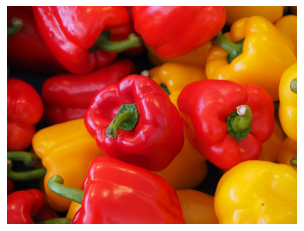

In [4]:
# load image
img = plt.imread('peppers.jpg')
#img = plt.imread('rose2.jfif')
plt.imshow(img) #show image
plt.axis('off');


In [18]:
img.shape[0]

480

The image above has 480 pixels in height and 640 pixels in width.  Each pixel has 3 values that represent how much red, green and blue it has. Below you can play with different combinations of RGB to create different colors. In total, you can create $256^3 = 16,777,216$ unique colors.

img_flat = img.reshape(img.shape[0]*img.shape[1],3)
print(img_flat.shape)
img_flat[:5,:]
img_flat.shape

In [28]:
img_flat = img.reshape(img.shape[0]*img.shape[1],3)
print(img_flat.shape) 

(307200, 3)


In [29]:

kmeans = KMeans(n_clusters=20).fit(img_flat)
kmeans.labels_

array([ 4,  4,  4, ..., 18, 18, 18])

In [32]:
# loops for each cluster center
#replace kmeans.labels_ with kmeans.cluster_centers_[i]

img_flat2=img_flat.copy()

for i in np.unique(kmeans.labels_):
    img_flat2[kmeans.labels_== i,:] = kmeans.cluster_centers_[i]

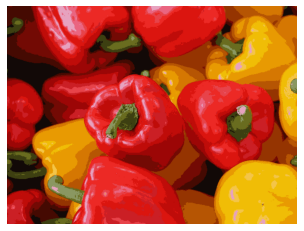

In [33]:
img2=img_flat2.reshape(img.shape)
plt.imshow(img2)
plt.axis("off");

Apply Elbow Method

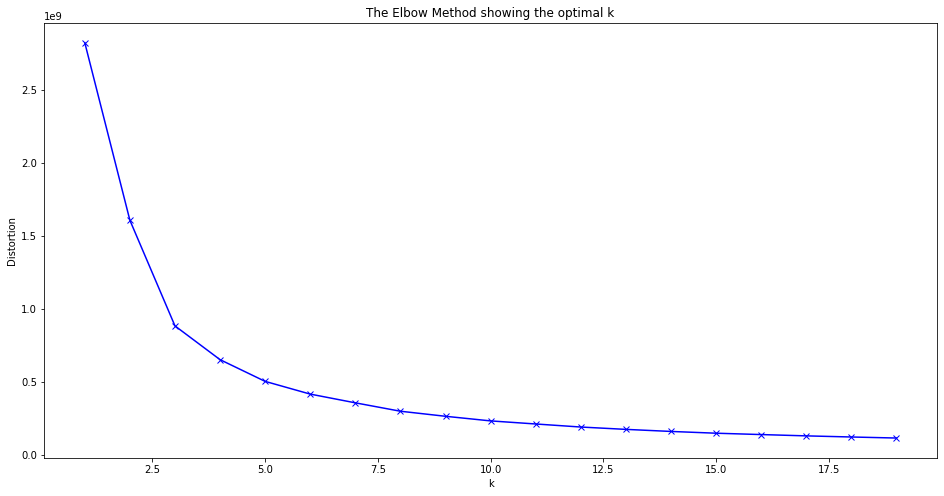

In [38]:
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(img_flat)
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()    